# GOALS
1. Understand the pattern/slope of the dataset

2. Minimize the difference between the 1.) predicted and 2.) actual values.

## ASSUMPTION: There exists a linear relationship

## Calculate Error using Mean Squared Error or MSE 

It's important to find the best 1.) parameters of the model (i.e. weight and bias)
which is found through the gradient/derivative by Gradient Descent

weight (w)  =  w- (learning rate)(derivative of w)

bias (b) = b- (learning rate)(derivative of b)

*See notebook for more notes*

# STEPS

## Pre-testing

**Training:**
1. At first, initialize weight as 0 
2. At first,  initialize bias as 0

**Given a data point:**
1. Predict result by using y^ = wx + b
2. Calculate error
3. Use gradient descent to figure out new weight and bias values
4. Repeat n times

## Testing:

Given a data point:
1. Put in the values from the data point into the equation y^ = wx + b


In [8]:
import numpy as np

class LinearRegression:
    
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
        
    def fit(self, X, y):
        n_samples, n_features = X.shape #Given a 2D array, assign index 0 as n_samples
        #and index 1 as n_features
        self.weights = np.zeros(n_features) #Creating a zero array EQUIVALENT to no. of features
        self.bias = 0
        
        #Initalization above^ happens only once
        
        for _ in range(self.n_iters):
            #Linear Regression Equation (Equation of the Line)
            y_pred = np.dot(X, self.weights) + self. bias

            #Derivative of weight

            dw = (1/n_samples) * ( 2*(np.dot(X, (y_pred - y))) )

            #Dot product package includes the summation, no need to do np.sum

            #Derivative of bias
            db = (1/n_samples) * ( 2 *np.sum(y_pred - y) )

            self.weight = self.weight - (self.lr*dw)
            self.bias = self.bias - (self.lr*db)
    
    def predict():
        pass

# Final Code

In [17]:
import numpy as np

class LinearRegression:
    
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
        
    def fit(self, X, y):
        n_samples, n_features = X.shape #Given a 2D array, assign index 0 as n_samples
        #and index 1 as n_features
        self.weights = np.zeros(n_features) #Creating a zero array EQUIVALENT to no. of features
        self.bias = 0
        
        #Initalization above^ happens only once
        
        for _ in range(self.n_iters):
            #Linear Regression Equation (Equation of the Line)
            y_pred = np.dot(X, self.weights) + self.bias

            #Derivative of weight

            dw = (1/n_samples) * ((np.dot(X.T, (y_pred - y))) )

            #Dot product package includes the summation, no need to do np.sum

            #Derivative of bias
            db = (1/n_samples) * (np.sum(y_pred - y) )

            self.weights = self.weights - (self.lr*dw)
            self.bias = self.bias - (self.lr*db)
    
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

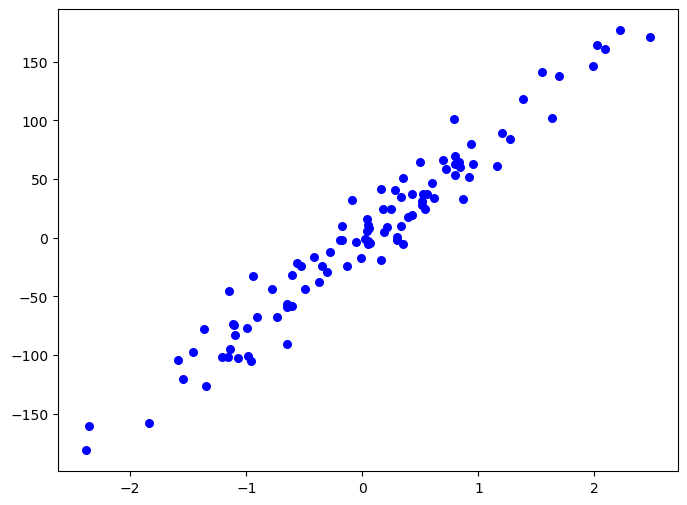

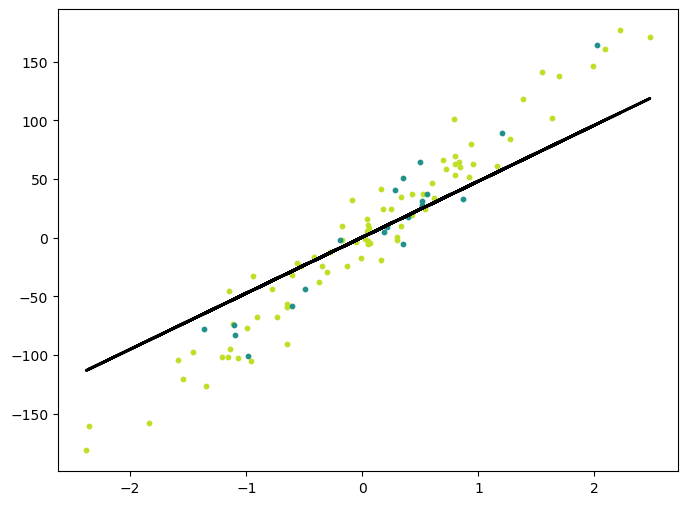


Mean Squared Error (MSE): 783.8155465125494
Sum of squares of residuals (SS_res): 15676.31093025099
Total sum of squares (SS_tot): 81270.51469917125
R^2: 0.8071094912062757
Coefficient of determination (R^2): 0.8071094912062757


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
# from LinearRegression import LinearRegression

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#FIRST GRAPH
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color="b", marker = "o", s = 30)
plt.show()

#BREAK LINE
print()

reg = LinearRegression()
reg.fit(X_train, y_train)

predictions = reg.predict(X_test)


#SHOW SECOND GRAPH
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 =  plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color = 'black', linewidth=2, label = 'Prediction')
plt.show()

#BREAK LINE
print()

#MSE Function
def mse(y_test, predictions):
    return np.mean( (y_test-predictions)**2 )

mse = mse(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

#OTHER FORMULAS

# Calculate sum of squares of residuals
SS_res = np.sum((y_test - predictions) ** 2)

# Calculate total sum of squares
y_mean = np.mean(y_test)
SS_tot = np.sum((y_test - y_mean) ** 2)

# Calculate coefficient of determination (R^2)
R_squared = r2_score(y_test, predictions)

    #OR METHOD 2
r_squared = 1 - (SS_res/SS_tot)




print("Sum of squares of residuals (SS_res):", SS_res)
print("Total sum of squares (SS_tot):", SS_tot)
print("R^2:", r_squared)
print("Coefficient of determination (R^2):", R_squared)

# Increased learning rate to 0.1

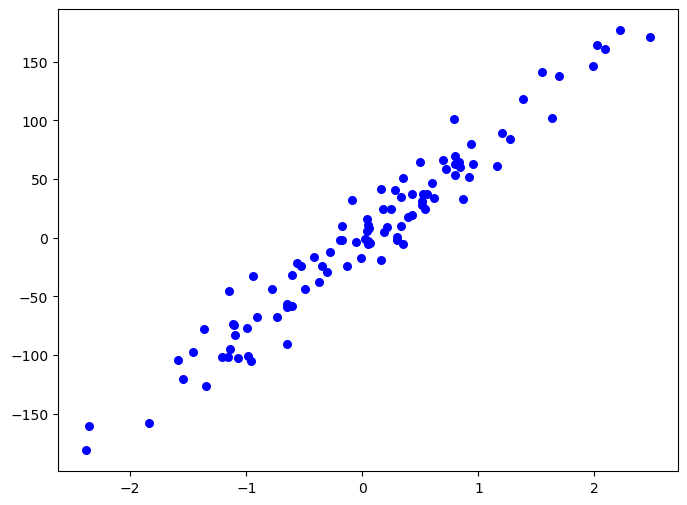

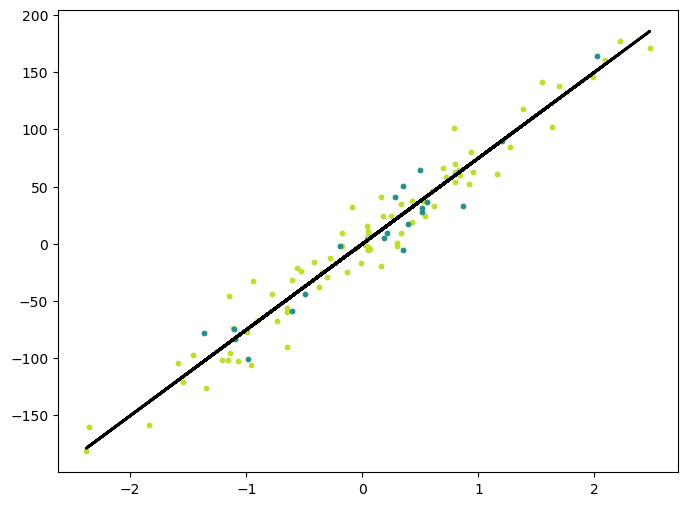


Mean Squared Error (MSE): 305.77413162286416
Sum of squares of residuals (SS_res): 6115.482632457283
Total sum of squares (SS_tot): 81270.51469917125
R^2: 0.9247515208302275
Coefficient of determination (R^2): 0.9247515208302275


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
# from LinearRegression import LinearRegression

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#FIRST GRAPH
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color="b", marker = "o", s = 30)
plt.show()

#BREAK LINE
print()

reg = LinearRegression(0.1) #change learning rate here
reg.fit(X_train, y_train)

predictions = reg.predict(X_test)


#SHOW SECOND GRAPH
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 =  plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color = 'black', linewidth=2, label = 'Prediction')
plt.show()

#BREAK LINE
print()

#MSE Function
def mse(y_test, predictions):
    return np.mean( (y_test-predictions)**2 )

mse = mse(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

#OTHER FORMULAS

# Calculate sum of squares of residuals
SS_res = np.sum((y_test - predictions) ** 2)

# Calculate total sum of squares
y_mean = np.mean(y_test)
SS_tot = np.sum((y_test - y_mean) ** 2)

# Calculate coefficient of determination (R^2)
R_squared = r2_score(y_test, predictions)

    #OR METHOD 2
r_squared = 1 - (SS_res/SS_tot)




print("Sum of squares of residuals (SS_res):", SS_res)
print("Total sum of squares (SS_tot):", SS_tot)
print("R^2:", r_squared)
print("Coefficient of determination (R^2):", R_squared)

# Following the Proper derivative

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

class LinearRegression:
    
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
        
    def fit(self, X, y):
        n_samples, n_features = X.shape #Given a 2D array, assign index 0 as n_samples
        #and index 1 as n_features
        self.weights = np.zeros(n_features) #Creating a zero array EQUIVALENT to no. of features
        self.bias = 0
        
        #Initalization above^ happens only once
        
        for _ in range(self.n_iters):
            #Linear Regression Equation (Equation of the Line)
            y_pred = np.dot(X, self.weights) + self.bias

            #Derivative of weight

            dw = (1/n_samples) * (2*(np.dot(X.T, (y_pred - y))) )
            
            #To get the dot product, we need to get the transpose AND THEN do dot product
            #Therefore "X.T"

            #Dot product package includes the summation, no need to do np.sum

            #Derivative of bias
            db = (1/n_samples) * (2*(np.sum(y_pred - y)) )

            self.weights -= (self.lr*dw)
            self.bias -= (self.lr*db)
    
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

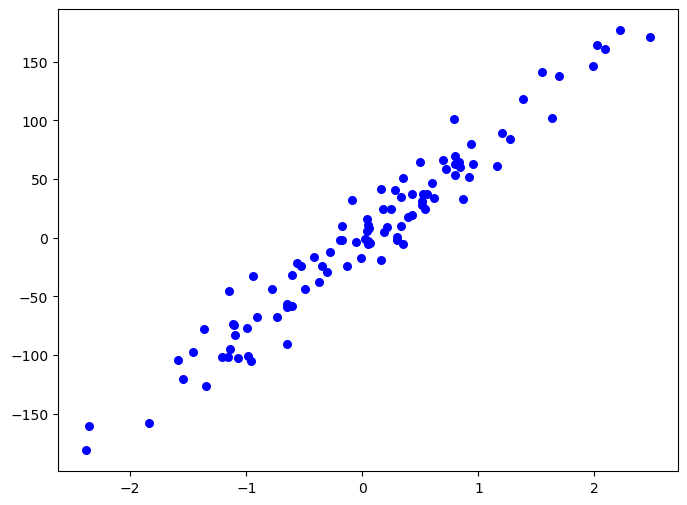

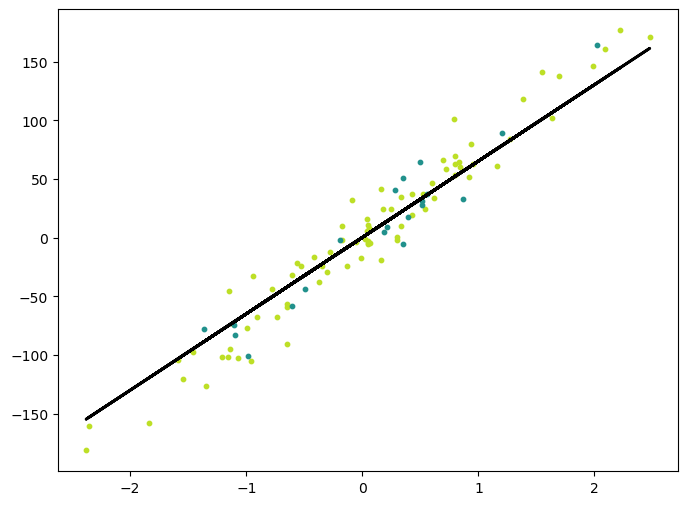


Mean Squared Error: 361.2812896055198


In [27]:
# from LinearRegression import LinearRegression
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color="b", marker = "o", s = 30)
plt.show()

print()

#Create Linear Regression model
reg = LinearRegression()

#Fit model
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

#Compute predictions
y_pred_line = reg.predict(X)

#SHOW SECOND GRAPH
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 =  plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color = 'black', linewidth=2, label = 'Prediction')
plt.show()

print()

# # Calculate Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, predictions)
# print("Mean Squared Error:", mse)

#MSE Function
def mse(y_test, predictions):
    return np.mean( (y_test-predictions)**2 )

mse = mse(y_test, predictions)
print("Mean Squared Error:", mse)

# ChatGPT Generated Linear Regression using Sci-kit learn

Mean Squared Error: 0.9177532469714291


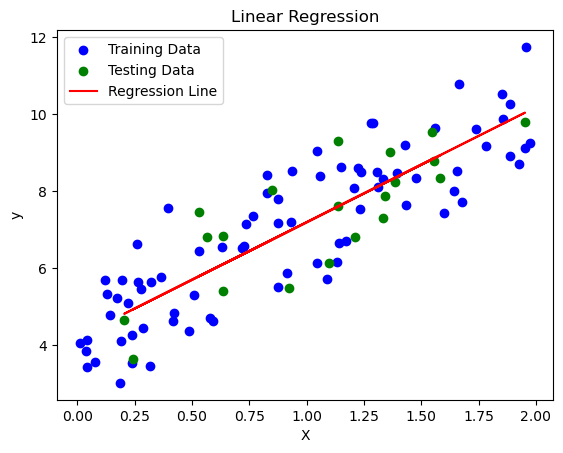

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate some random data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the training data and the regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()